In [98]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import lightgbm as lgbm
import xgboost as xgb
from catboost import CatBoostRegressor

Спрогнозируйте вероятность того, что кандидат будет работать на компанию


**Атрибуты**:

- enrolle_id - Уникальный идентификатор кандидата
- city - Код города
- city_ development _index - Индекс развития города (масштабированный)
- gender - пол кандидата
- relevent_experience - релевантный опыт кандидата
- enrolled_university - тип обучения в университете (если был)
- education_level - уровень образования кандидата
- major_discipline - основная специальность по образованию
- experience - общий стаж кандидата в годах
- company_size - размер компании в работниках
- company_type - тип работодателя
- lastnewjob - дельта в годах между предыдущей и текущей работах
- training_hours - кол-во завершенных часов обучения
- target 0 – Не ищу новую работу
- target 1 – Ищу новую работу

**Установите с самом начале (в качестве random_state) RAND=10**

In [99]:
RAND = 10
N_FOLDS = 5

# Import data

1) Прочитать файл aug_train.csv и записать в переменную `df`

In [100]:
df = pd.read_csv('aug_train.csv')

# EDA

2) Замените в значениях признаках `last_new_job`, `experience` и `company_size`:
    
- символ '>' на 'more_'
- символ '<' на 'less_'


Лучше всего написать функцию и далее применить ее к признаку при помощи `map()`

In [101]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [102]:
# пример функции

def replace_more_less(text):
    """Преобразование more less"""
    # Ваш код

3) Вывести общую информацию о датасете при помощи метода `info()`, а также основные описательные статистики для числовых и категориальных признаков

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

4) Посмотрите на целевую переменную `target`, есть ли дисбаланс классов? Отобразите на графике процентное содержание объектов в каждом классе (пример в лекции по EDA) 

C:\Users\maxim\AppData\Local\Temp\ipykernel_8784\2547710597.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target']);


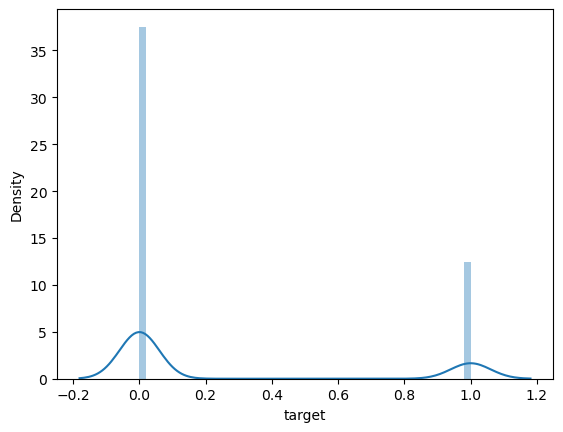

In [104]:
#create boxplot of one column
sns.distplot(df['target']);

5) Сравнить при помощи `displot` значение индекса города для тех кто ищет и кто не ищет работу (похожее задание было в ДЗ EDA). Есть ли разница?

Не забывайте про `common_norm=False`

In [108]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


6) Сравнить при помощи `displot` кол-во завершенных часов обучения для тех кто ищет и кто не ищет работу (похожее задание было в ДЗ EDA). Есть ли разница?

Не забывайте про `common_norm=False`

C:\Users\maxim\AppData\Local\Temp\ipykernel_8784\764060918.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['training_hours']);


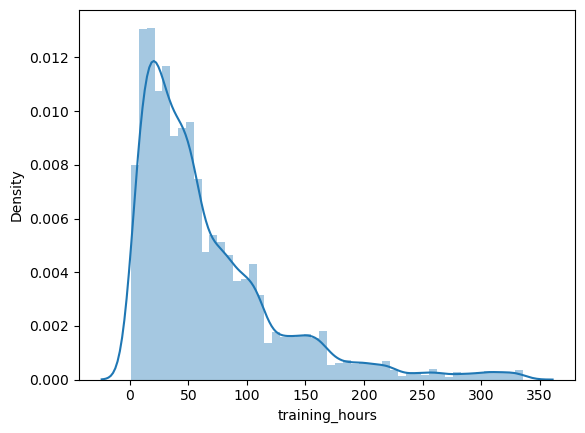

In [109]:
#create boxplot of one column
sns.distplot(df['training_hours']);

7) Построить график `boxplot` для такого параметра как `city_development_index` (по OY) в разрезе `relevent_experience` (по OX), сравнив все эти показатели относительно `target` (hue).

Что можно сказать, глядя на график?

In [107]:
# Ваш код

8) Отобразите на одном графике долю людей, которые ищут/не ищут работу, в разрезе по каждого признака из списка ниже:

`['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']`

- Можно написать отдельный метод (будет выводить вам график), в который вы будете подавать датасет, колонку_1 для анализа (список выше), колонку_2 - `target`
- Графики можно вывести в цикле путем прохождения по списку признаков выше и подачи их в метод для построения графиков
- Каждое уникальное значение признака вы должны рассматривать в разрезе `target`, с учетом этого нормирование должно быть на кол-во объектов в `target`
- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее
- **Какие выводы** вы можете сделать? напишите кратко

**Пример:**

- Всего человек 100
    - Из них искало работу (target=1) = 30
        - мужчин = 20 -> 20/30*100% = `67%`
        - женщин = 10 -> 10/30*100% = `33%`
    - Из них не искало работу (target=0) = 70
        - мужчин = 20 -> 20/70*100% = `28%`
        - женщин = 50 -> 50/70*100% = `72%`
        
**Подсказка:**
- `groupby` + `value_counts(normalize=True)`

In [79]:
# Ваш код

9) Сгенерируйте дополнительные признаки (бины), добавьте их в датасет, использовать метод `pandas.cut()`:

- `city_development_bins` - на основе признака `city_development_index`, параметры:
    - `bins=[0, 0.5, 0.6, 1], right=True, labels=['low', 'middle', 'high']`


- `training_hours_bins` - на основе признака `training_hours`, параметры:
    - `bins=[0, 50, 200, 500], right=True, labels=['low', 'middle', 'high']`

In [80]:
# Ваш код

10) Заполните пропуски в датасете

In [81]:
# Ваш код

11) Перевести признаки типа `object` в категориальный тип данных

In [82]:
# Ваш код

# Modeling
## XGBoost
### Baseline

12) Обучите Baseline XGBoost:

- с ранней остановкой `early_stopping_rounds`
- предварительно разбейте данные на train/validation/test (**бинаризуйте категориальный признаки**)
    - как пример без создания новой переменной: ```X = pd.get_dummies(df.drop(['enrollee_id', 'target'], axis=1))```
- если ваша версия xgboost позволяет обрабатывать категориальные признаки, то используйте датасет с category признаками
- не забывайте про фиксацию `random_state`
- не забываем про `stratify`
- в качесте `eval_metric` возьмите "auc"
- также учесть, что у вас дисбаланс классов (использовать `scale_pos_weight`)
- добавьте результаты в датасет с метриками - **metrics**
- проверьте, не **переобучилась** ли модель

Аккуратно вычисляйте scale_pos_weight, ручной способ не использовать!

In [93]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X, y, early_stopping_rounds=5)

ValueError: feature_names must be string, and may not contain [, ] or <

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Columns: 186 entries, city_development_index to last_new_job_never
dtypes: float64(1), int64(1), uint8(184)
memory usage: 3.7 MB


## LightGBM
### Baseline

13) Обучите Baseline LightGBM:

- с ранней остановкой `early_stopping_rounds`
- предварительно разбейте данные на train/validation/test - **для категориальный данных**, то есть прошлые разбиения для XGBoost не используем!
- не забывайте про фиксацию random_state
- в качесте `eval_metric` возьмите "auc"
- также учесть, что у вас дисбаланс классов (использовать `scale_pos_weight`)
- добавьте результаты в датасет с метриками - metrics
- проверьте, не **переобучилась** ли модель

In [97]:
train_X = df[feat_cols]
val_X = df[feat_cols]
train_y = target.iloc[train_index]
val_y = target.iloc[val_index]
lgb_train = lgb.Dataset(train_X, train_y, categorical_feature=categoricals)
lgb_eval = lgb.Dataset(val_X, val_y, categorical_feature=categoricals)
gbm = lgbm.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=(lgb_train, lgb_eval),
                early_stopping_rounds=100,
                verbose_eval = 100)
models.append(gbm)

NameError: name 'feat_cols' is not defined

## Catboost
### baseline

14) Обучите Baseline Catboost:

- с ранней остановкой `early_stopping_rounds`
- Можно использовать разбиения train/validation/test на предыдущей итерации в LightGBM
- не забывайте про фиксацию `random_state`
- в качесте `eval_metric` возьмите "AUC" (подается в экземпляр класса)
- также учесть, что у вас дисбаланс классов (использовать `scale_pos_weight`)
- добавьте результаты в датасет с метриками - metrics
- проверьте, не **переобучилась** ли модель

In [89]:
cb_model = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='AUC',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
cb_model

# Tuning

15) Выберите лучший Baseline:
    
- найдите для него оптимальные параметры (лучше всего использовать Optuna, можно также RandomSearch, но для Catboost точно RandomSearch)
- показатели на тесте должны **быть лучшими среди предыдущих результатов** (ориентируемся на ROC-AUC)
- можете также попробовать использовать pruning в Optuna
- обучите модель на лучших параметрах (пока без использования кросс-валидации)
- добавьте результаты в датасет с метриками - metrics

## Catboost

In [ ]:
# Ваш код

# Holdout

16) Обучите выбранный ранее алгоритм из 15 задания, используя кросс-валидацию

- Проанализируйте метрики на OOF и Holdout
- Добавьте в датасет с метриками результаты на Holdout данных

Удалось ли улучшить показатели по сравнению с бейзлайном?

In [ ]:
# Ваш код